In [1]:
%pylab inline
rcParams['figure.max_open_warning'] = False
from scipy.stats import scoreatpercentile
import os,sys
gpath = os.path.join(os.environ['BOK90PRIMEOUTDIR'],'bokpipe_v0.1','diagnostics')
sys.path.append('..')
import bokrmgnostic
gaindat = bokrmgnostic.all_gain_vals(gpath)

Populating the interactive namespace from numpy and matplotlib


In [2]:
nim = len(gaindat)
utds = unique(gaindat['utDate'])
nutd = len(utds)
utindex = [where(utds==utd)[0][0] for utd in gaindat['utDate']]
colorval = 256 * array(utindex).astype(float) / nutd
colorz = cm.jet(colorval.astype(int))

In [3]:
def plotgains(norm=False):
    for j in [0,1]:
        ks = [[0,4,8,12],[0]][j]
        dks = [[1,2,3],[4,8,12]][j]
        for k in ks:
            for dk in dks:
                figure(figsize=(12,4))
                for pnum,filt in enumerate('gi',start=1):
                    subplot(1,2,pnum)
                    ii = np.where(gaindat['filt']==filt)[0]
                    gratio = gaindat['gains'][ii,j,k+dk]/gaindat['gains'][ii,j,k]
                    if norm:
                        for utd in utds:
                            ii2 = np.where(gaindat['utDate'][ii]==utd)[0]
                            if len(ii2)==0: continue
                            gratio[ii2] /= gratio[ii2].mean()
                    scatter(gaindat['skys'][ii,j],gratio,
                            marker={'g':'o','i':'s'}[filt],edgecolors='none',
                            c=colorz[ii],alpha=0.7)
                    title('filt=%s cor%d amp1=%d amp2=%d' %(filt,j,k+1,k+dk+1))
                    xlim({'g':700,'i':2000}[filt],40000)
                    ylim(0.99*scoreatpercentile(gratio,1),
                         1.01*scoreatpercentile(gratio,99))
                    xscale('log')

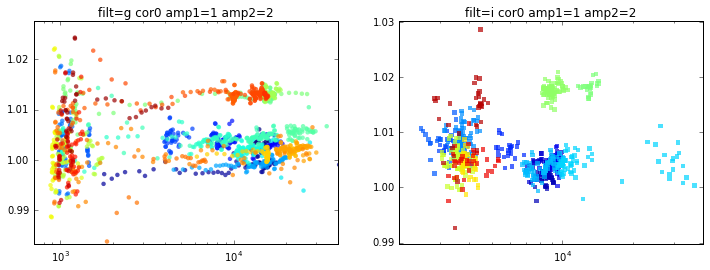

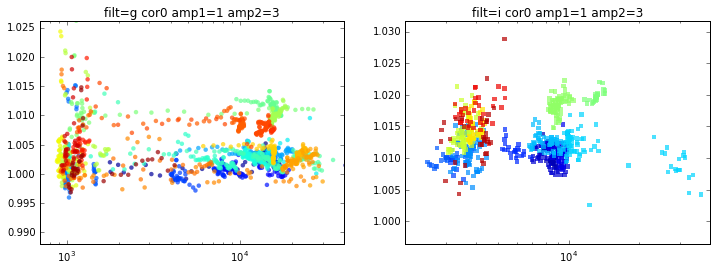

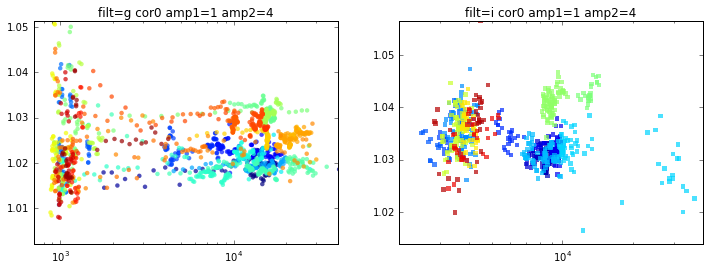

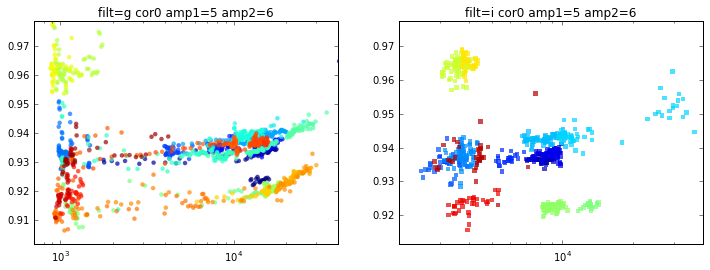

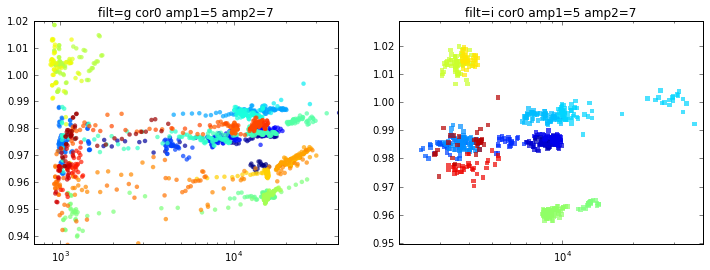

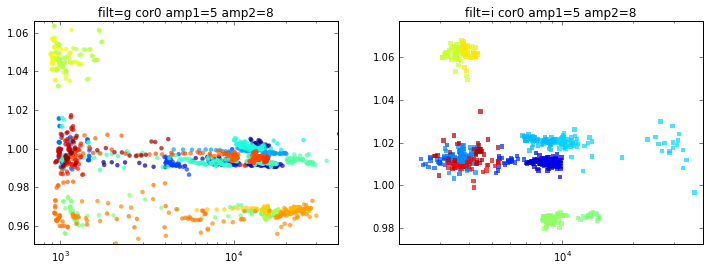

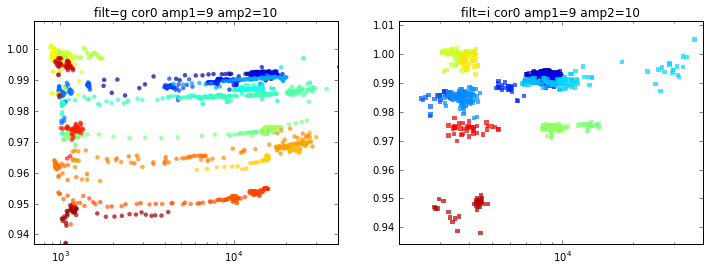

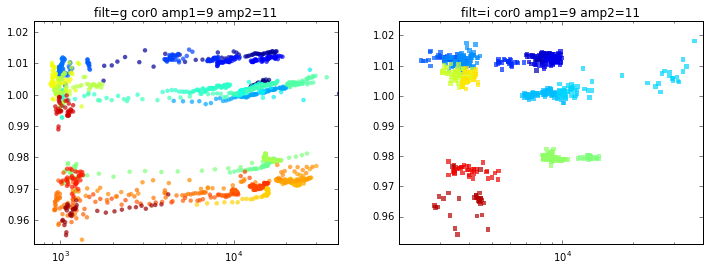

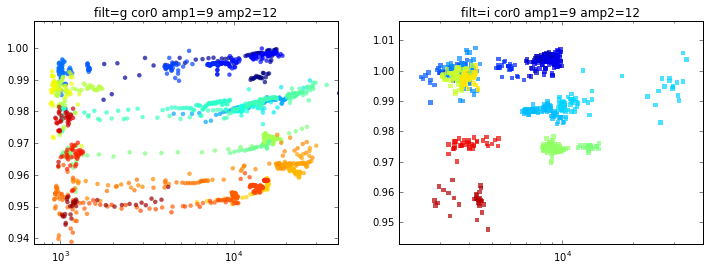

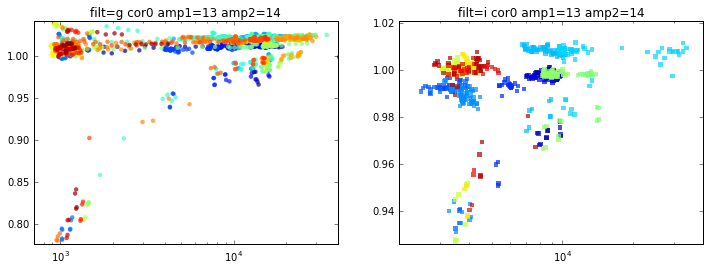

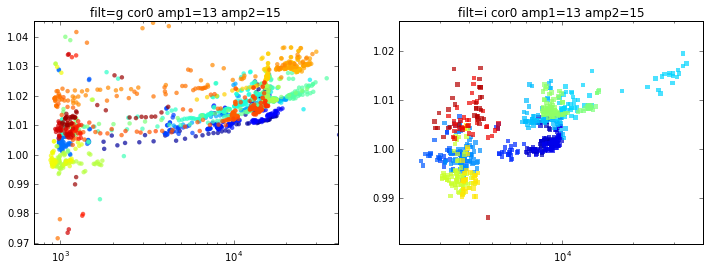

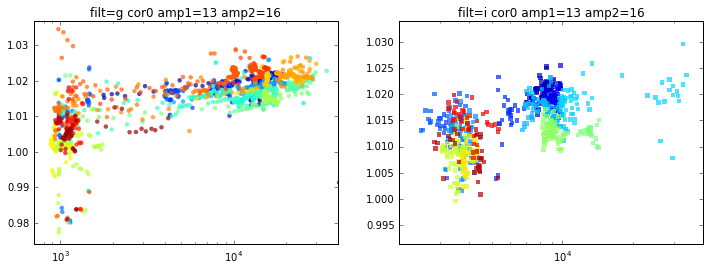

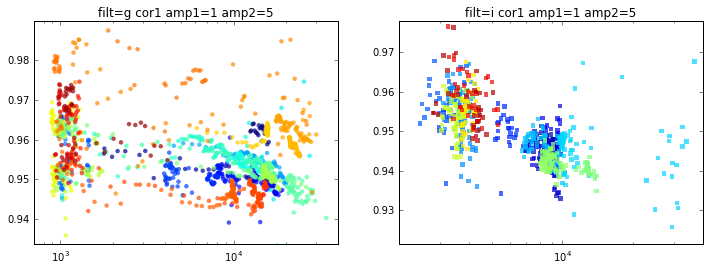

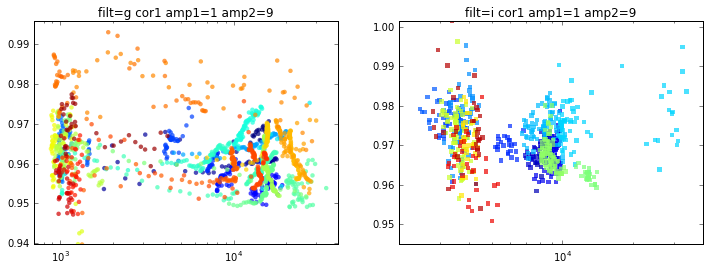

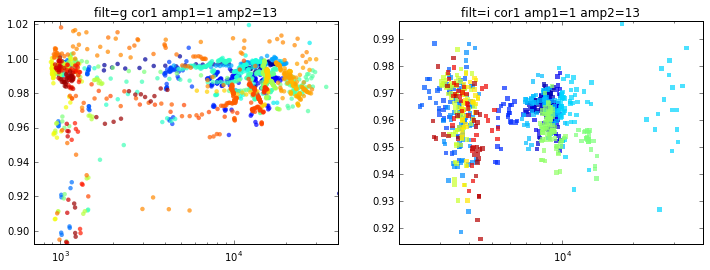

In [4]:
plotgains()

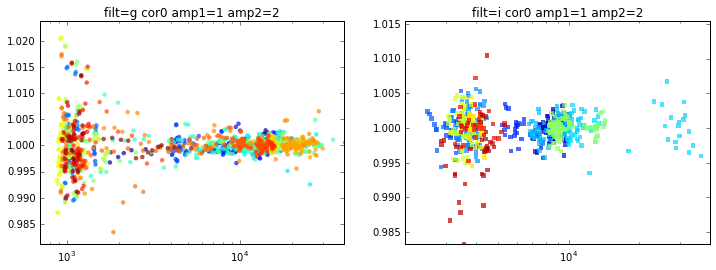

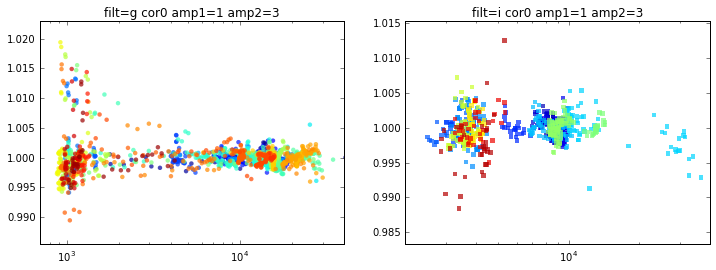

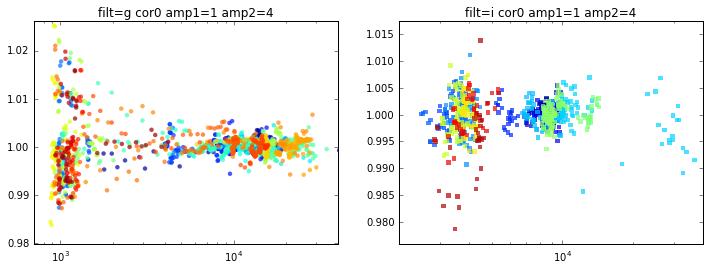

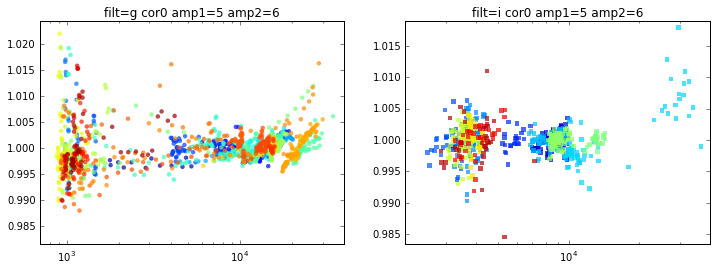

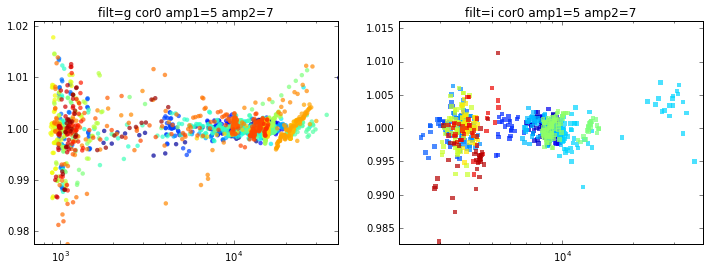

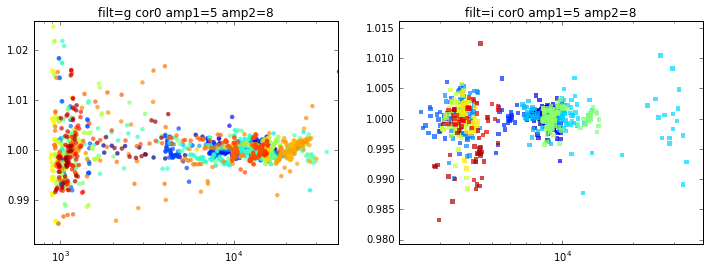

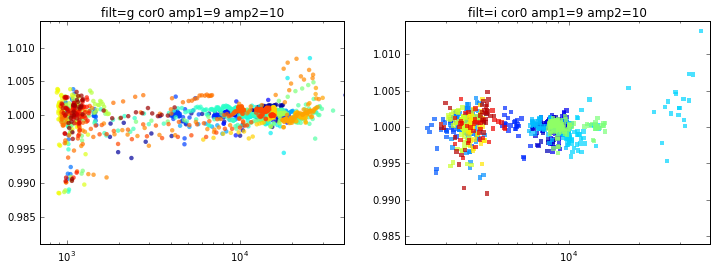

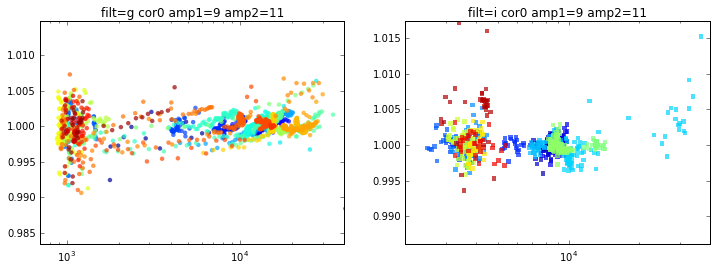

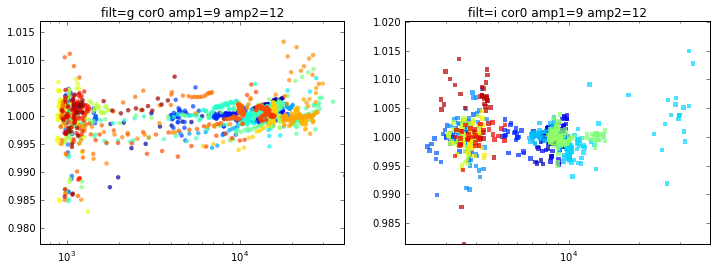

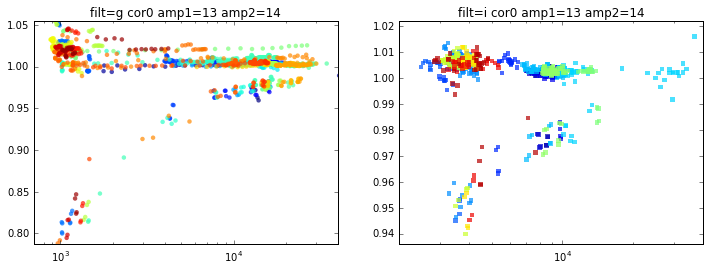

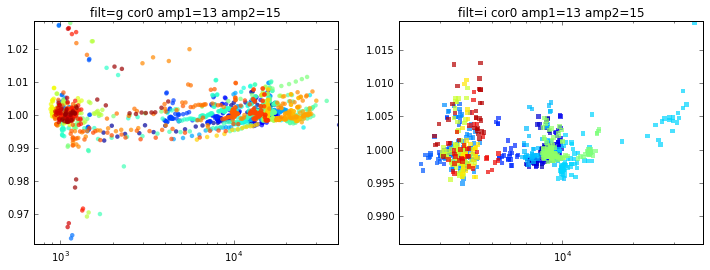

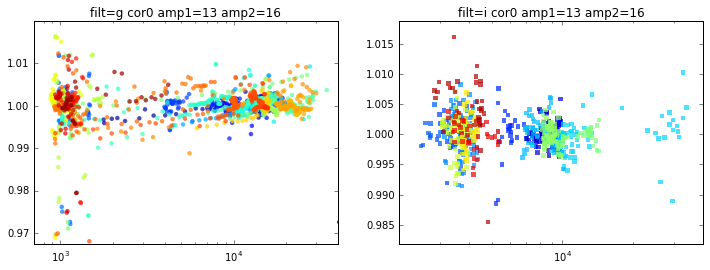

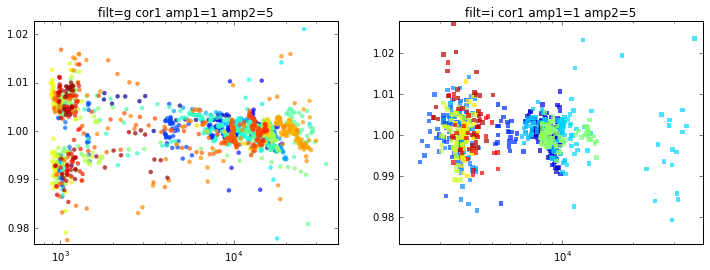

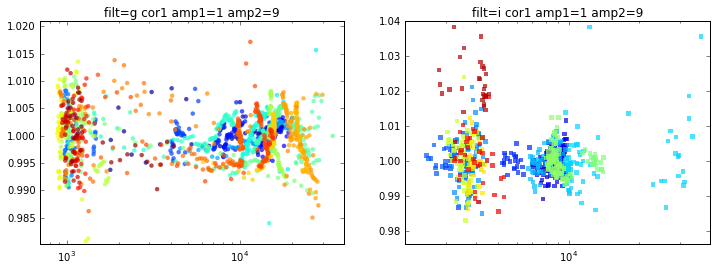

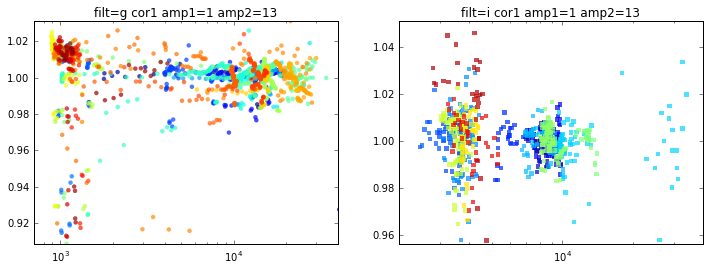

In [5]:
plotgains(norm=True)

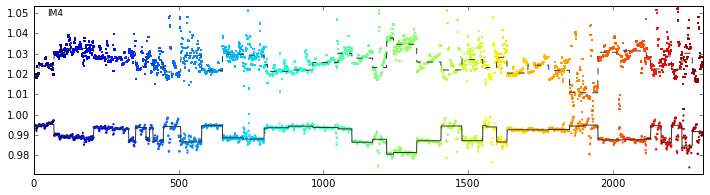

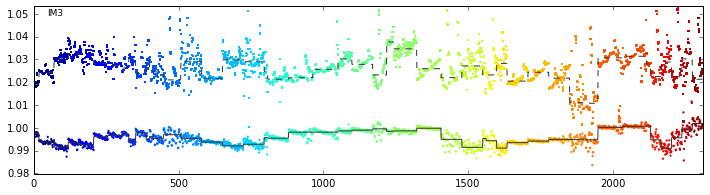

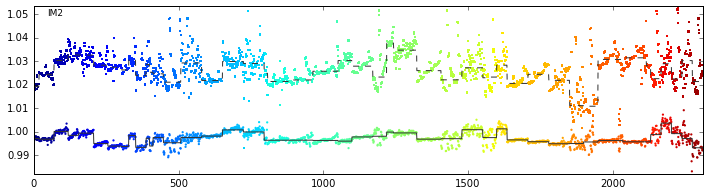

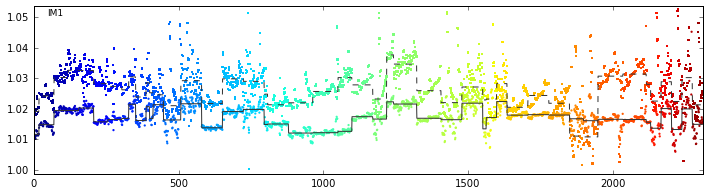

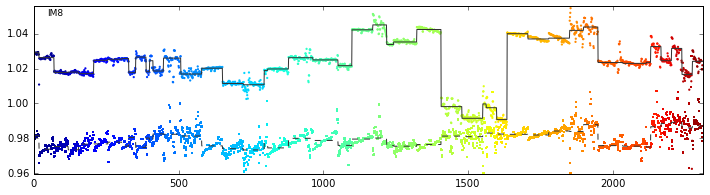

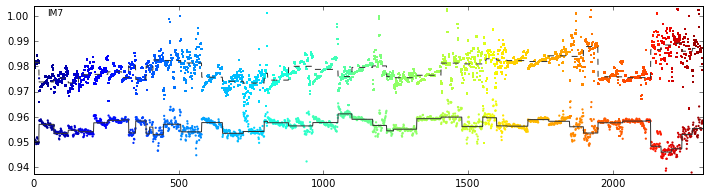

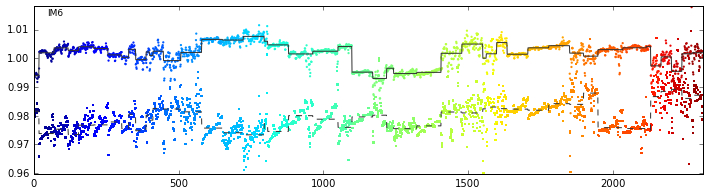

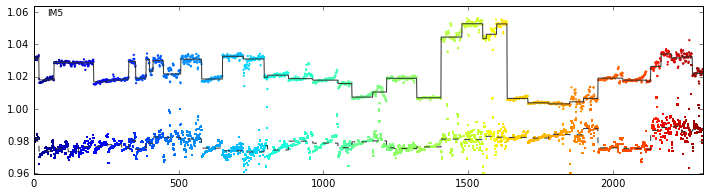

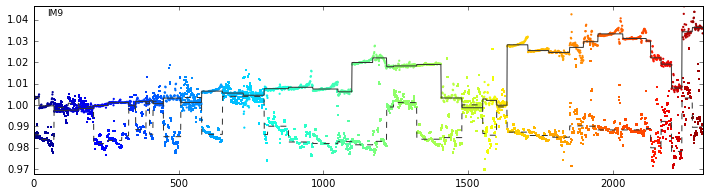

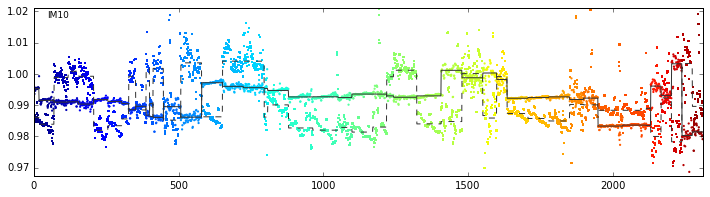

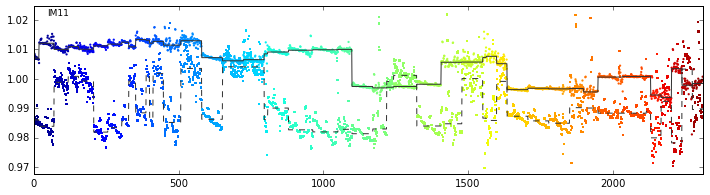

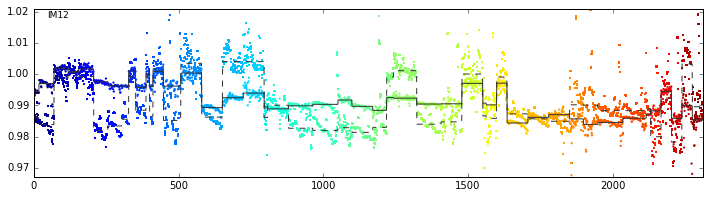

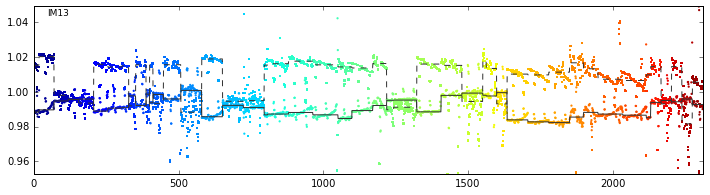

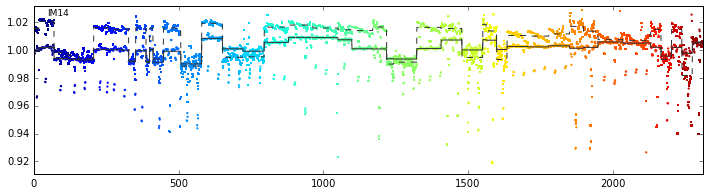

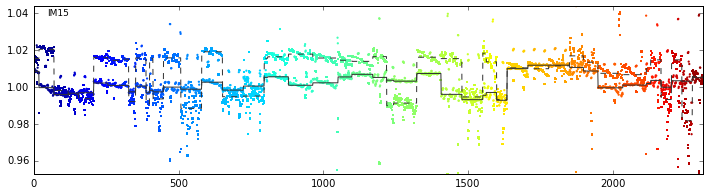

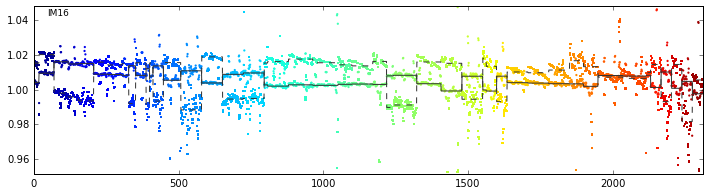

In [6]:
from bokpipe.bokproc import ampOrder
for k in range(16):
    figure(figsize=(12,3))
    ax = subplot(111)
    for j in range(2):
        scatter(arange(nim),
                gaindat['gains'][:,j,k],marker='os'[j],c=colorz,
               edgecolors='none',s=5)
        plot(arange(nim),gaindat['gainCor'][:,j,k],
             c='0.2',ls=['-','--'][j])
    xlim(-1,nim+1)
    ylim(0.99*scoreatpercentile(gaindat['gains'][:,:,k],1),
         1.01*scoreatpercentile(gaindat['gains'][:,:,k],99))
    text(0.02,0.99,'IM%d'%ampOrder[k],size=9,va='top',transform=ax.transAxes)